# Exercise 1: Sorting Lists of Pairs

(Note that in this exercise, questions may be attempted without having completed all previous questions)

Consider the abstract Python class below:

In [1]:
class Comparison:
    def __init__(self):
        pass
    
    #returns True if the two objects are comparable,
    #False otherwise
    def areComparable(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if the two objects are equal,
    #False otherwise
    def __eq__(self, other):
        raise Exception("NotImplementedException")
   
    #returns True if self > other,
    #False otherwise
    def __gt__(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if self < other,
    #False otherwise
    def __lt__(self, other):
        raise Exception("NotImplementedException")    
        
    def __ne__(self, other):
        return not self.__eq__(other)
                
    def __ge__(self, other):
        return self.__eq__(other) or self.__gt__(other)

    def __le__(self, other):
        return self.__eq__(other) or self.__lt__(other)
        
    def compare(self, other):
        if self.areComparable(other) is False:
            return None
        elif self == other:
            return 0
        elif self < other:
            return -1
        elif self > other:
            return 1
        else:
            assert False, "Inconsistent operation definitions"

The Comparison class provides a way to model items that are not always comparable. For instance, the pair of integers $(5, 10)$ is greater than $(4, 8)$, but it is not comparable to $(6, 5)$, because $5 < 6$ and $10 > 5$.

In this exercise, we will look into different ways to sort list of pairs. We will suppose that the pairs in a list are all different.  

## Question 1.1

The rules of comparison between two Pairs $(a, b)$ and $(c, d)$ are:
* $(a, b) == (c, d)$ if and only if $a == c$ and $b == d$,
* $(a, b) > (c, d)$ if and only if ($a > c$ and $b \geq d$) or ($a \geq c$ and $b > d$),
* $(a, b) < (c, d)$ if and only if ($a < c$ and $b \leq d$) or ($a \leq c$ and $b < d$).

We say that $(a, b)$ and $(c, d)$ are comparable if 
* $(a, b) == (c, d)$, or
* $(a, b) > (c, d)$, or
* $(a, b) < (c, d)$.

We ask that you implement the rules above in the class called Pair below, by completing the functions that have a comment "#TODO" in the body. Note that the class Pair inherits from Comparison.

In [2]:
class Pair(Comparison):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({},{})".format(self.x, self.y)
    
    # checks for comparision.   
    def areComparable(self, other):
        if self == other:
            return True
        elif self > other:
            return True
        elif self < other:
            return True
        else:
            return False
        
    # redefining '==' operator  
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    #redefining '>' operator
    def __gt__(self, other):
        return (self.x > other.x and self.y >= other.y) or (self.x >= other.x and self.y > other.y)
        
    #redefining '<' operator
    def __lt__(self, other):
        return (self.x < other.x and self.y <= other.y) or (self.x <= other.x and self.y < other.y)

We provide a test class below. You don't need to edit it, but the class Pair you write need pass these tests! 

In [3]:
import unittest

class TestPair(unittest.TestCase):
    def setUp(self):
        self.v00 = Pair(0,0)
        self.v01 = Pair(0,1)
        self.v10 = Pair(1, 0)
        self.v11 = Pair(1, 1)
        self.v21 = Pair(2, 1)
        self.v31 = Pair(3, 1)
        self.v23 = Pair(2, 3)
        self.v23other = Pair(2, 3)
        
    def test_areComparable(self):
        self.assertTrue(self.v00.areComparable(self.v01))
        self.assertTrue(self.v01.areComparable(self.v00))
        
        self.assertTrue(self.v11.areComparable(self.v00))
        self.assertTrue(self.v00.areComparable(self.v11))
        
        self.assertTrue(self.v21.areComparable(self.v23))
        self.assertTrue(self.v23.areComparable(self.v21))
        
        self.assertTrue(self.v23.areComparable(self.v23))
        
        self.assertTrue(self.v23.areComparable(self.v23other))
        self.assertTrue(self.v23other.areComparable(self.v23))
        
        self.assertFalse(self.v01.areComparable(self.v10))
        self.assertFalse(self.v10.areComparable(self.v01))
        
        self.assertFalse(self.v31.areComparable(self.v23))
        self.assertFalse(self.v23.areComparable(self.v31))
        
    def test_eq(self):
        self.assertTrue(self.v00 == self.v00)
        self.assertTrue(self.v21 == self.v21)
        self.assertTrue(self.v23 == self.v23)
        self.assertTrue(self.v23 == self.v23other)
        
        self.assertFalse(self.v00 == self.v11)
        self.assertFalse(self.v21 == self.v11)
        self.assertFalse(self.v21 == self.v23)
        
    def test_ne(self):
        self.assertFalse(self.v00 != self.v00)
        self.assertFalse(self.v21 != self.v21)
        self.assertFalse(self.v23 != self.v23)
        self.assertFalse(self.v23 != self.v23other)
        
        self.assertTrue(self.v00 != self.v11)
        self.assertTrue(self.v21 != self.v11)
        self.assertTrue(self.v21 != self.v23)
        
    def test_gt(self):
        self.assertTrue(self.v01 > self.v00)
        self.assertTrue(self.v10 > self.v00)
        self.assertTrue(self.v31 > self.v21)
        
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v21 > self.v31)
        
        self.assertFalse(self.v10 > self.v01)
        self.assertFalse(self.v01 > self.v10)
        self.assertFalse(self.v31 > self.v23)
        self.assertFalse(self.v23 > self.v31)
        
    def test_lt(self):
        self.assertFalse(self.v01 < self.v00)
        self.assertFalse(self.v10 < self.v00)
        self.assertFalse(self.v31 < self.v21)
        
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v21 < self.v31)
        
        self.assertFalse(self.v10 < self.v01)
        self.assertFalse(self.v01 < self.v10)
        self.assertFalse(self.v31 < self.v23)
        self.assertFalse(self.v23 < self.v31)

In [4]:
test = TestPair()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In the following questions, we suppose that we have a set of Pairs, and that not every two pairs in that set are comparable.

## Question 1.2

Given a list $l$ of Pairs in no particular order, use a sorting algorithm similar to *selection sort* to sort $l$ such that, at the end of the algorithm, for every two pairs $l[i]=(a, b)$ and $l[j]=(c, d)$ at index $i$ and $j$ in $l$, respectively, with $i <j$, we have:
* either $(a, b) \leq (c, d)$,
* or $(a, b)$ and $(c, d)$ are not comparable.

In [5]:
def pairSort(l):
    # iterate the list from the end
    for i in range(len(l)-1,0,-1):
        pos = 0
        
        # considering the first element as reference, compare the rest of the list.
        for j in range(1,i+1):
            if l[j] > l[pos]:
                pos = j
        
        # swap the elements to attain a sorted list
        l[pos],l[i]=l[i],l[pos]

Again, we provide a test class below. You don't need to edit it, but the method pairsort you wrote needs to pass these tests! 

In [6]:
import unittest
import random

class TestPairSort(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort
    
    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
        
    def test4(self):
        #in this test we suppose x and y are not fixed
        #we suppose there is no two pairs that are comparable
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
        
    def test5(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we only test one case
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
    
    def test6(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we generate many cases
        for size in range(0, 100):
            #create a list
            l = []
            xs = random.sample(range(0, 100), size)
            xy = random.sample(range(0, 100), size)
            for i in range(0, size):
                l.append(self.PairClass(xs[i], xy[i]))
            self.sortAlgo(l)
            #for item in l: print(item)
            self.checkorder(l)
        
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [7]:
test = TestPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.701s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.3

Suppose we have a list of Pairs of integers.
We want to implement a comparison mechanism between two pairs of integers using a function **pairKey**, which takes a pair as input and outputs a single number. The function pairKey should be such that for two pairs $(a, b)$ and $(c, d)$,
* $(a,b) > (c,d)$ implies $pairKey((a,b)) > pairKey((c,d))$,
* $(a,b) < (c,d)$ implies $pairKey((a,b)) < pairKey((c,d))$,
* $(a,b) == (c,d)$ implies $pairKey((a,b)) == pairKey((c,d))$.

In [8]:
def pairKey(pair):
    # return the sum of both elements in the pair to order the sequence.
    a = pair.x
    b = pair.y
    return a+b

If you have defined the function pairKey correctly, we should now be able to use the built-in sort function of Python to sort our Pairs:

In [9]:
def pairSortWithKey(l):
    l.sort(key = pairKey)

(For more information on what the above does, please refer to https://docs.python.org/3/howto/sorting.html)

In [10]:
class TestKeyPairSort(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortWithKey

In [11]:
test = TestKeyPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.623s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.4

Prove that the pairKey function you have defined above provides a guarantee that, if used as key for Python's sort, then the list will be sorted as stated in Queston 1.2.

Given,
1. The list is sorted in increasing pair value order.
2. Place the non-comparable pairs next to each other.

We know that the in-built python sort consideres the input and arranges the elements in the input list in increasing order. The pairKey function defined above just sums both the values in the pair and returns a number which is passes as a list of key to the in-built python sort function.

This results in an output list of the sum-value of pairs, which places the list of pairs in 
1. an ascending order
2. and non-comparable pairs next to other.

for example, consider a list of pairs
$$inputList = [Pair(9,5),Pair(1,2),Pair(3,4),Pair(7,2),Pair(2,1),Pair(7,2),Pair(7,3),Pair(7,1)] $$

$$ sortedList : (1,2),(2,1),(3,4),(7,1),(7,2),(7,2),(7,3),(9,5) $$

pairKey function computes the 2nd pair ($Pair(1,2)$) and 5th pair ($Pair(2,1)$) to have athe same value "3". We know that these pairs are not comparable and needs to be places next to other, The sorted order produced by pairKey also produces the same output as two pairs computed the same sum has to be places nect to each other.


Thus, the above defined pairKey fuction guarantees the output sorted list to be as stated in Question 1.2.

***


## Question 1.5

(We have *not* covered the concept of stability in this unit. If you are not yet familiar with this concept, learning about it is part of the question. See e.g. [here](https://en.wikipedia.org/wiki/Sorting_algorithm#Stability) to start.)

In this question we ask you to use Python's built-in sort. Use the fact that Python's sort is stable to provide a simple solution to sort a list of pairs as stated in Question 1.2. Use unit testing as in the previous questions to test your solution. Both your solution and the unit testing will be assessed. (no need to rewrite *new* test cases; use the old ones).

In [12]:
def pairSortUsingStability(l):
    # sorting first and second elements of the pair to actively sort the complet list
    l.sort(key = keyA)
    l.sort(key = keyB)

def keyA(pair):
    a = pair.x
    return a

def keyB(pair):
    b = pair.y
    return b

In [13]:
class TestPairSortUsingStability(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortUsingStability

In [14]:
test = TestPairSortUsingStability()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.610s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.6

Define a function pairSortFast that takes a list $l$ of $n$ Pairs as input and sort this list in $O(n)$ time in the worst case (not the amortised worst case). Suppose that any pair $(a,b)$ in $l$ is such that $a$ and $b \in \{0, \dots, U\}$, where $U$ is a small integer. Hint: *a clever hashing function* may help.

In [15]:
def pairSortFast(l):
    sortedList = []
    
    # assuming U to be 200.
    max_U = 2 * 200
    occ = dict()
    
    # using a dictionary to store the hasked value and item
    for i in l:
        if pairKey(i) in occ:
            occ[pairKey(i)].append(i)
        else:
            occ[pairKey(i)] = [i]
    
    # reverting the pairs into sequence of their hashed sorted order
    for i in sorted(occ):
        sortedList.append(occ[i])
    return sortedList

# defining the hash function method
def pairKey(pair):
    a = pair.x
    b = pair.y
    return a+b

lister = [Pair(9,5),Pair(1,2),Pair(3,4),Pair(7,2),Pair(2,7),Pair(7,3),Pair(7,1)]
a = pairSortFast(lister)
for i in a:
    for j in i:
        print(j)

(1,2)
(3,4)
(7,1)
(7,2)
(2,7)
(7,3)
(9,5)


In [16]:
class TestPairSortFast(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort

In [17]:
test = TestPairSortFast()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.694s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.7

Thoroughly benchmark all the sorting algorithms you have written, and plot their running time as a function of the size of the input list. You may use methods and code seen in the lectures or tutes and pracs during the semester.

In [18]:
import random

# generating a random pair using the inbuilt random function
def generatelist(n, lower = 0, upper = 1000, seed = 0):
    random.seed(seed)
    l = [None] * n
    for i in range(0,n):
        l[i] = Pair(random.randrange(lower, upper),random.randrange(lower, upper))
    return l

Maximum computing time: 0:00:20
Actual computing time: 0:00:01


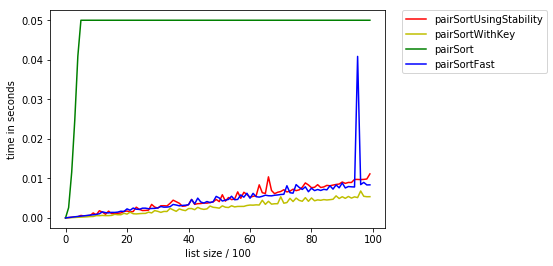

In [27]:
from timeit import default_timer as timer
import datetime
import matplotlib.pyplot as plt 

#defining the list of different algorithms to be plotted
sorting_algorithms = [pairSortUsingStability, pairSortWithKey, pairSort ,pairSortFast]

# Initialising the styples for the plot.
styles = {}
styles[pairSortUsingStability] = "r-"
styles[pairSortWithKey] = "y-"
styles[pairSort] = "g-"
styles[pairSortFast] = "b-"


# computing the list of all the time values for different lengths of list to plot the same according to the algorthm type.
def computeandplot(sorting_algorithms):
    step = 100
    nsamples = 100
    samples = range(0, nsamples)
    timelimit = 0.05 
    totaltime = 0
    print("Maximum computing time:",str(datetime.timedelta(seconds=timelimit*nsamples*len(sorting_algorithms))))
    for sortalgo in sorting_algorithms:
            attimelimit = False
            times = [timelimit for _ in samples]
            for i in samples:
                if i == 0:
                    times[i] = 0
                    continue
                n = step * i
                if attimelimit == False:
                    l = generatelist(n)
                    start = timer()
                    sortalgo(l)
                    end = timer()
                    times[i] = end - start
                    totaltime += times[i]
                    if times[i] > timelimit:
                        times[i] = timelimit
                        attimelimit = True

            plt.plot(samples, times,styles[sortalgo],label=sortalgo.__name__)
    print("Actual computing time:", str(datetime.timedelta(seconds=int(totaltime))))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("list size / {}".format(step))
    plt.ylabel("time in seconds")
    plt.show()

computeandplot(sorting_algorithms)

# Exercise 2

You are given a tree $T$ with an integer value (negative or positive) at each node. We want to select a subtree of $T$, which contains at least the root ot $T$, that minimises the sum of the values at its nodes. Note that the answer is trivially $T$ if all nodes have a negative value, and simply the root of $T$ if all nodes have a positive value.

## Question 2.1

Define a data structure to store $T$.

In [20]:
# define a class tree to structure the data.
class Tree:
    def __init__(self, key):
        self.key = key
        self.children = []
    
    # print method defined
    def __str__(self):
        return str(self.key)
    
    # method to add child is defined
    def addChild(self, child):
        self.children.append(child)
    
    # methof to get the child of a given node
    def getChild(self, node):
        return self.children[node]
    
    # method to determine the number of childern
    def getChildren(self):
        return len(self.children)
    
    # method define to iterate through the tree
    def __iter__(self):
        return self.children.__iter__()

## Question 2.2

Design and code a dynamic programming algorithm that solves this problem and returns the optimal value. What is its $O()$ complexity in the worst-case?

In [21]:
# method to return the sum of the optimal subtree
def subTree_val(tree):    
    val = sum(checkMin(tree))
    if val == 0:
        return tree.key
    else:
        return val

# method to check for the nodes of sub-tree with the minimum value 
def checkMin(tree):
    sum_stack=[]   
    if tree.getChildren() != 0:
        for i in tree:
            sum_stack += checkMin(i)       
        if sum(sum_stack) + tree.key < 0:
            sum_stack.append(tree.key)    
    elif tree.getChildren() == 0:
        if tree.key < 0: 
            sum_stack.append(tree.key)
    return sum_stack

The above algorithm traverses through each node of a tree and checks for the number of children it pocesses. by this we can conclude that the complexity is $O(n)$ since it iterates through the tree once.

If the children exists, it iterates through the sub-tree once again to find the sum of the parent and childern values so the complexity multiples by $O(n)$.

Thus, the overall algorithm has a complexity of $O(n*n)$ = $O(n^2)$

## Question 2.3

 Write and run unit tests and performance tests.

In [22]:
import unittest
from timeit import default_timer as timer
import datetime

class TestMinsubtree(unittest.TestCase):
    def treeRandom():
        root = Tree(1)
        root.addChild(Tree(-2))
        root.addChild(Tree(3))
        root.addChild(Tree(4))
        #second level
        root.getChild(0).addChild(Tree(-5))
        root.getChild(1).addChild(Tree(-6))
        root.getChild(2).addChild(Tree(7))
        #third level
        root.getChild(0).getChild(0).addChild(Tree(8))
        root.getChild(0).getChild(0).addChild(Tree(9))
        root.getChild(0).getChild(0).addChild(Tree(10))
        root.getChild(2).getChild(0).addChild(Tree(11))
        #fourth level
        root.getChild(2).getChild(0).getChild(0).addChild(Tree(12))
        return root

    def treePositive():
        root = Tree(1)
        root.addChild(Tree(2))
        root.addChild(Tree(3))
        root.addChild(Tree(4))
        #second level
        root.getChild(0).addChild(Tree(5))
        root.getChild(1).addChild(Tree(6))
        root.getChild(2).addChild(Tree(7))
        #third level
        root.getChild(0).getChild(0).addChild(Tree(8))
        root.getChild(0).getChild(0).addChild(Tree(9))
        root.getChild(0).getChild(0).addChild(Tree(10))
        root.getChild(2).getChild(0).addChild(Tree(11))
        #fourth level
        root.getChild(2).getChild(0).getChild(0).addChild(Tree(12))
        return root
    
    def treeNegative():
        root = Tree(1)
        root.addChild(Tree(-2))
        root.addChild(Tree(-3))
        root.addChild(Tree(-4))
        #second level
        root.getChild(0).addChild(Tree(-5))
        root.getChild(1).addChild(Tree(-6))
        root.getChild(2).addChild(Tree(-7))
        #third level
        root.getChild(0).getChild(0).addChild(Tree(-8))
        root.getChild(0).getChild(0).addChild(Tree(-9))
        root.getChild(0).getChild(0).addChild(Tree(-10))
        root.getChild(2).getChild(0).addChild(Tree(-11))
        #fourth level
        root.getChild(2).getChild(0).getChild(0).addChild(Tree(-12))
        return root
    
    def testwithRandom(self):
        fullTree = treeRandom()
        result = subTree_val(fullTree)
        assertEquals(result,-9)
        
        
    def testwithPositive(self):
        fullTree = treePositive()
        result = subTree_val(fullTree)
        assertEquals(result,1)
        
    def testwithNegative(self):
        fullTree = treeNegative()
        result = subTree_val(fullTree)
        assertEquals(result,-76)
    
RandTree = TestMinsubtree.treeRandom()
start = timer()
subTree_val(RandTree)
end = timer()
print("Test with both negative and positive value has a performance time of:",end - start)


PosTree = TestMinsubtree.treePositive()
start = timer()
subTree_val(PosTree)
end = timer()
print("Test with only positive balue has a performance time of:",end - start)

NegTree = TestMinsubtree.treeNegative()
start = timer()
subTree_val(NegTree)
end = timer()
print("Test with only negative balue has a performance time of::",end - start)


test = TestPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....

Test with both negative and positive value has a performance time of: 6.718901568092406e-05
Test with only positive balue has a performance time of: 9.320900426246226e-05
Test with only negative balue has a performance time of:: 6.491199019365013e-05


.
----------------------------------------------------------------------
Ran 6 tests in 0.701s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>